In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix

# Importing 2 datasets and merging the 2 datasets into one

In [3]:
pd.set_option('display.max_columns',None)
df_mat = pd.read_csv('C:/Users/rajan/Assignment 1_1413/Data/student-mat.csv',sep=';')
df_por = pd.read_csv('C:/Users/rajan/Assignment 1_1413/Data/student-por.csv',sep=';')

In [4]:
#Merging Two Datasets
df = pd.concat([df_mat, df_por])

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [6]:
df.shape

(1044, 33)

# Checked for the null values and did not found any null values. Also renamed the column names with some meaningful name

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [8]:
print(df.describe())

               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1

In [9]:
print(df.nunique())

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64


In [10]:
df.columns = df.columns.str.capitalize()
df.rename(columns={'Famsize': 'Family Size',
                   'Pstatus': 'Parent Cohabitation Status',
                   'Medu': 'Mother Education',
                   'Fedu': 'Father Education',
                   'Mjob': 'Mother Job',
                   'Fjob': 'Father Job',
                   'Traveltime': 'Travel Time',
                   'Studytime': 'Study Time',
                   'Schoolsup': 'School Support',
                   'Famsup': 'Family Educational Support',
                   'Paid': 'Extra Paid Course',
                   'Activities': 'Activities',
                   'Nursery': 'Nursery School',
                   'Higher': 'Wants To Take Higher Ed',
                   'Internet': 'Internet Access',
                   'Romantic': 'Romantic Relationship',
                   'Famrel': 'Family Relationship',
                   'Freetime': 'Free Time After School',
                   'Goout': 'Going Out With Friends',
                   'Dalc': 'Workday Alcohol Consumption',
                   'Walc': 'Weekend Alcohol Consumption',
                   'Health': 'Current Health Status',
                   'Absences': 'Number of School Absences'},
                    inplace=True)

In [11]:
df

,School,Sex,Age,Address,Family Size,Parent Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,Reason,Guardian,Travel Time,Study Time,Failures,School Support,Family Educational Support,Extra Paid Course,Activities,Nursery School,Wants To Take Higher Ed,Internet Access,Romantic Relationship,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


# Looking for null value and replaced the non-numerical values with numerical values so that the whole dataset should be in numeric

In [12]:
print(df.isnull().sum())

School                         0
Sex                            0
Age                            0
Address                        0
Family Size                    0
Parent Cohabitation Status     0
Mother Education               0
Father Education               0
Mother Job                     0
Father Job                     0
Reason                         0
Guardian                       0
Travel Time                    0
Study Time                     0
Failures                       0
School Support                 0
Family Educational Support     0
Extra Paid Course              0
Activities                     0
Nursery School                 0
Wants To Take Higher Ed        0
Internet Access                0
Romantic Relationship          0
Family Relationship            0
Free Time After School         0
Going Out With Friends         0
Workday Alcohol Consumption    0
Weekend Alcohol Consumption    0
Current Health Status          0
Number of School Absences      0
G1        

In [13]:
def numerical_data():
    df['School'] = df['School'].map({'GP': 0, 'MS': 1})
    df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
    df['Address'] = df['Address'].map({'U': 0, 'R': 1})
    df['Family Size'] = df['Family Size'].map({'LE3': 0, 'GT3': 1})
    df['Parent Cohabitation Status'] = df['Parent Cohabitation Status'].map({'T': 0, 'A': 1})
    df['Mother Job'] = df['Mother Job'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Father Job'] = df['Father Job'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Reason'] = df['Reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['Guardian'] = df['Guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['School Support'] = df['School Support'].map({'no': 0, 'yes': 1})
    df['Family Educational Support'] = df['Family Educational Support'].map({'no': 0, 'yes': 1})
    df['Extra Paid Course'] = df['Extra Paid Course'].map({'no': 0, 'yes': 1})
    df['Activities'] = df['Activities'].map({'no': 0, 'yes': 1})
    df['Nursery School'] = df['Nursery School'].map({'no': 0, 'yes': 1})
    df['Wants To Take Higher Ed'] = df['Wants To Take Higher Ed'].map({'no': 0, 'yes': 1})
    df['Internet Access'] = df['Internet Access'].map({'no': 0, 'yes': 1})
    df['Romantic Relationship'] = df['Romantic Relationship'].map({'no': 0, 'yes' : 1})

In [14]:
numerical_data()
df

,School,Sex,Age,Address,Family Size,Parent Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,Reason,Guardian,Travel Time,Study Time,Failures,School Support,Family Educational Support,Extra Paid Course,Activities,Nursery School,Wants To Take Higher Ed,Internet Access,Romantic Relationship,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,2,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,1,0,1,1,3,4,2,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,0,0,1,1,3,4,3,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,1,0,4,2,1,2,0,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,1,0,3,3,4,4,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,2,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10
645,1,1,18,0,0,0,3,1,0,2,2,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16
646,1,1,18,0,1,0,1,1,4,4,2,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9
647,1,0,17,0,0,0,3,1,2,2,2,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10


In [15]:
df.isnull().sum()

School                         0
Sex                            0
Age                            0
Address                        0
Family Size                    0
Parent Cohabitation Status     0
Mother Education               0
Father Education               0
Mother Job                     0
Father Job                     0
Reason                         0
Guardian                       0
Travel Time                    0
Study Time                     0
Failures                       0
School Support                 0
Family Educational Support     0
Extra Paid Course              0
Activities                     0
Nursery School                 0
Wants To Take Higher Ed        0
Internet Access                0
Romantic Relationship          0
Family Relationship            0
Free Time After School         0
Going Out With Friends         0
Workday Alcohol Consumption    0
Weekend Alcohol Consumption    0
Current Health Status          0
Number of School Absences      0
G1        

In [16]:
df

,School,Sex,Age,Address,Family Size,Parent Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,Reason,Guardian,Travel Time,Study Time,Failures,School Support,Family Educational Support,Extra Paid Course,Activities,Nursery School,Wants To Take Higher Ed,Internet Access,Romantic Relationship,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,2,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,1,0,1,1,3,4,2,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,0,0,1,1,3,4,3,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,1,0,4,2,1,2,0,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,1,0,3,3,4,4,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,2,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10
645,1,1,18,0,0,0,3,1,0,2,2,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16
646,1,1,18,0,1,0,1,1,4,4,2,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9
647,1,0,17,0,0,0,3,1,2,2,2,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10


# If the value of G1, G3 and G3 is greater then 9 then replaced it with 1 and if it is less then and equal to 9 then replaced with 0 for better understanding

In [17]:
df.loc[df.G3 <= 9, 'G3'] = 0
df.loc[df.G3 > 9, 'G3'] = 1

In [18]:
df.loc[df.G2 <= 9, 'G2'] = 0
df.loc[df.G2 > 9, 'G2'] = 1

In [19]:
df.loc[df.G1 <= 9, 'G1'] = 0
df.loc[df.G1 > 9, 'G1'] = 1

In [20]:
df

,School,Sex,Age,Address,Family Size,Parent Cohabitation Status,Mother Education,Father Education,Mother Job,Father Job,Reason,Guardian,Travel Time,Study Time,Failures,School Support,Family Educational Support,Extra Paid Course,Activities,Nursery School,Wants To Take Higher Ed,Internet Access,Romantic Relationship,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,2,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0,0,0
1,0,1,17,0,1,0,1,1,3,4,2,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0,0,0
2,0,1,15,0,0,0,1,1,3,4,3,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,0,0,1
3,0,1,15,0,1,0,4,2,1,2,0,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1,1,1
4,0,1,16,0,1,0,3,3,4,4,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,2,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,1,1,1
645,1,1,18,0,0,0,3,1,0,2,2,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,1,1,1
646,1,1,18,0,1,0,1,1,4,4,2,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,1,1,0
647,1,0,17,0,0,0,3,1,2,2,2,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,1,1,1


# Saving the independed features in X and the dependend feature in Y and split the dataset into 80% as a training data and 20% as a testing data

In [23]:
#X1 = df.drop('G1',axis=1)
#X2 = X1.drop('G2',axis=1)
#X = X2.drop('G3',axis=1)
#y = df['G1']

#dependent variable
#X = df[['Study Time','Failures', 'Number of School Absences', 'G1', 'G2']]

#dependent variable
#y = df['G3']

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
##def save_results(results,name,filename_pr):
  ##    print(name,file=file_object)
        ## print('Best Parameters: {}\n'.format(results.best_params_),file=file_object)
        ## print('Best Parameters: {}\n'.format(results.best_params_))
        ## print("The cv results are as follows : {}\n".format(results.cv_results_),file=file_object)

# We have trained the dataset with logistic regression,SVC, random forest classifier, gradient boosting

In [49]:
##svc_model_dir=os.path.join("/content/drive/MyDrive/Assignments/SVC",'svc_model.pkl')

svc_algo = SVC()

svc_parameters = {'kernel':('linear', 'rbf','sigmoid'), 'C':[10, 15]}

svc_cv=GridSearchCV(svc_algo, svc_parameters)

svc_cv.fit(X_train, y_train)

##save_results(svc_cv,'svm',os.path.join("/content/drive/MyDrive/Assignments/SVC",'SVC_results.txt'))

classifier=svc_cv.best_estimator_
##joblib.dump(classifier,svc_model_dir) 

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for svm = 0.911377245508982
Accuracy for test set for svm = 0.8803827751196173


In [50]:
confusion_matrix(y_pred_train, y_train)


array([[172,  59],
       [ 15, 589]], dtype=int64)

In [51]:
##log_reg_model_dir=os.path.join("/content/drive/MyDrive/Assignments/logistic_regression",'log_reg_model.pkl')

log_reg = LogisticRegression()

log_reg_parameters = {'penalty':['l1','l2'], 
              'C':[10, 10, 100, 100]}
logreg_cv=GridSearchCV(log_reg, log_reg_parameters)
logreg_cv.fit(X_train, y_train)
##save_results(logreg_cv,'log_reg',os.path.join("/content/drive/MyDrive/Assignments/logistic_regression",'log_reg_results.txt'))

logreg_classifier=logreg_cv.best_estimator_
##joblib.dump(logreg_classifier,log_reg_model_dir) 

# Predicting the Test set results
y_pred = logreg_classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = logreg_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Logistic Regression = 0.9209580838323354
Accuracy for test set for Logistic Regression = 0.9043062200956937


C:\Users\rajan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [52]:
confusion_matrix(y_pred_train, y_train)

array([[160,  39],
       [ 27, 609]], dtype=int64)

In [53]:
##rf_model_dir=os.path.join("/content/drive/MyDrive/Assignments/Random_Forest",'rf_model.pkl')


rf_algo= RandomForestClassifier()
rf_parameters = { 
           "n_estimators"      : [300, 350],
           "criterion"         : ["gini", "entropy"],
           "max_depth"         : [15, 20]}

rf_cv=GridSearchCV(rf_algo, rf_parameters)
rf_cv.fit(X_train, y_train)
##save_results(rf_cv,'rf',os.path.join("/content/drive/MyDrive/Assignments/Random_Forest",'rf_results.txt'))

rf_classifier=rf_cv.best_estimator_
##joblib.dump(rf_classifier,rf_model_dir) 


# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = rf_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Random Forest = 0.9988023952095808
Accuracy for test set for Random Forest = 0.8851674641148325


In [47]:
confusion_matrix(y_pred_train, y_train)


array([[187,   1],
       [  0, 647]], dtype=int64)

In [54]:
##GB_model_dir=os.path.join("/content/drive/MyDrive/Assignments/GB",'GB_model.pkl')

gb = GradientBoostingClassifier()   
parameters = {
        'learning_rate': [0.1, 0.01,0.1],
        'n_estimators': [100,200,300,400,500],
        'max_depth': [1,2,3,4,5]
        }
cv=GridSearchCV(gb, parameters)
cv.fit(X_train, y_train)
##save_results(cv,'Gradient Boost (GB)',os.path.join("/content/drive/MyDrive/Assignments/GB",'GR_GridSearchCV_results.txt'))
gb_classifier=cv.best_estimator_
##joblib.dump(gb_classifier,GB_model_dir)

y_pred = gb_classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = gb_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training set for Gradient Boosting = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Gradient Boosting = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Gradient Boosting = 0.9209580838323354
Accuracy for test set for Gradient Boosting = 0.8995215311004785


In [55]:
confusion_matrix(y_pred_train, y_train)


array([[169,  48],
       [ 18, 600]], dtype=int64)

<module 'matplotlib.pyplot' from 'C:\\Users\\rajan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

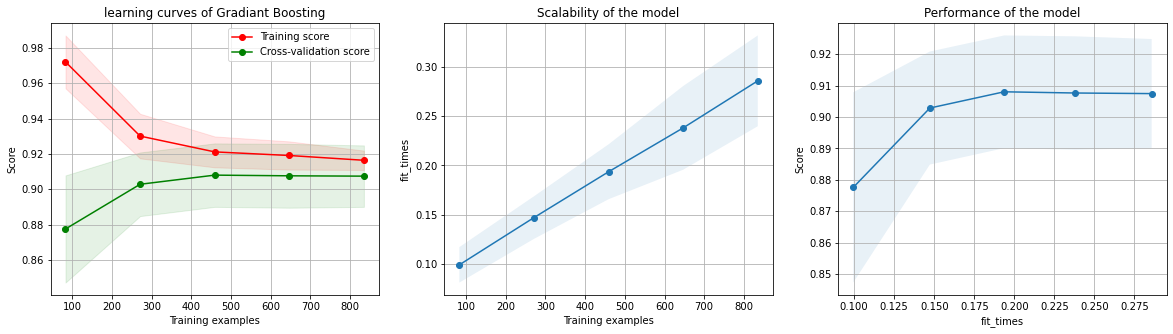

In [283]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,scoring=None,train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


title = "learning curves of Gradiant Boosting"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
plot_learning_curve(
    gb_classifier, title, X, y, cv=cv
)

<module 'matplotlib.pyplot' from 'C:\\Users\\rajan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

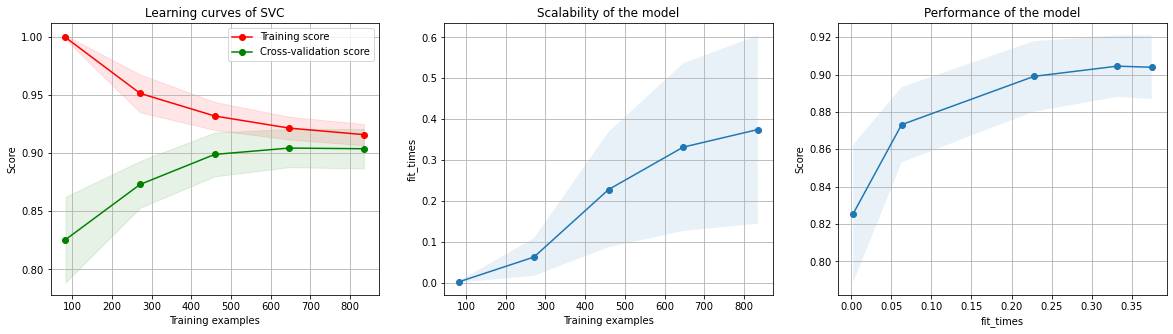

In [284]:
svn_title="Learning curves of SVC"
plot_learning_curve(
    classifier, svn_title, X, y, cv=cv
)

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

<module 'matplotlib.pyplot' from 'C:\\Users\\rajan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

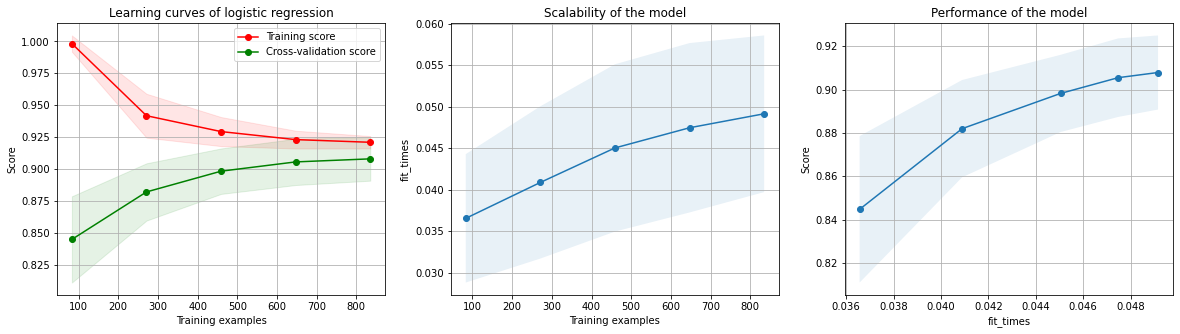

In [286]:
logreg_title="Learning curves of logistic regression"
plot_learning_curve(
    logreg_classifier, logreg_title, X, y, cv=cv
)

<module 'matplotlib.pyplot' from 'C:\\Users\\rajan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

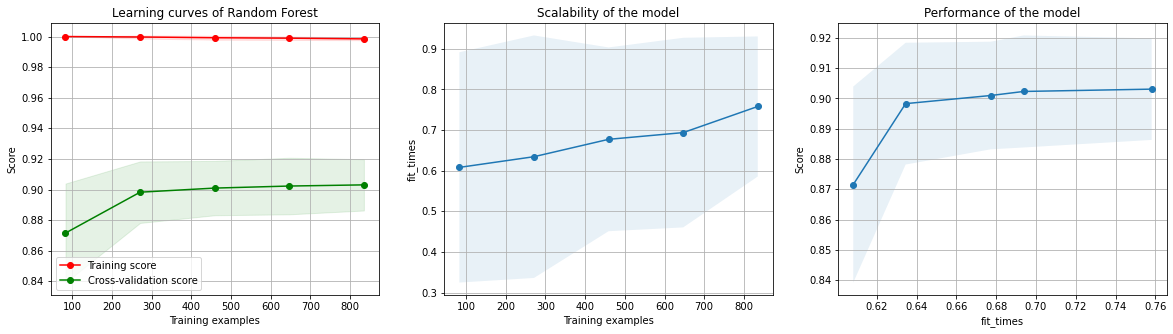

In [287]:
rf_title="Learning curves of Random Forest"
plot_learning_curve(
    rf_classifier, rf_title, X, y, cv=cv
)
